<a href="https://www.kaggle.com/code/dinislamgaraev/popular-japanese-words-analysis?scriptVersionId=133470297" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Popular Japanese Words Analysis

Let's look at the distribution of commonly used Japanese words by various aspects, exploring [Popular Japanese Words](https://www.kaggle.com/datasets/dinislamgaraev/popular-japanese-words) dataset.

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict

# Load Dataset

The dataset contains two files: words.tsv and tags.tsv. First of all, we need to load the files and take a look at them.

In [2]:
words_df = pd.read_csv('/kaggle/input/popular-japanese-words/words.tsv', delimiter='\t')
# make sure that the 'tags' column is in string format
words_df['tags'] = words_df['tags'].apply(str)
words_df

,word or phrase,kana,translation,tags
0,ああ,NaN,"like that, so",adverb|n4
1,嗚呼,ああ,"ah!, oh!, alas!, yes, indeed, that is correct,...",kana|n1
2,嗚呼嗚呼,ああああ,"aaah!, oooh!, oh no!, oh boy!",kana
3,ああ言う,ああいう,"that sort of, like that",adjective|expression|kana|noun|pre-noun adject...
4,愛,あい,"love, affection, care, attachment, craving, de...",n3|noun
...,...,...,...,...
29772,ワープロ,NaN,word processor,computing|n4|noun
29773,ワールド,NaN,world,noun
29774,ワールドカップ,NaN,World Cup (e.g. soccer),noun
29775,ワールドシリーズ,NaN,World Series (baseball),noun


In [3]:
tags_df = pd.read_csv('/kaggle/input/popular-japanese-words/tags.tsv', delimiter='\t')
tags_df.head(5)

,tag
0,adjective
1,adverb
2,auxiliary adjective
3,auxiliary verb
4,colloquial


In [4]:
all_tags = tags_df['tag']
print(f'There are {len(all_tags)} unique tags in total:\n{all_tags.values}')

There are 44 unique tags in total:
['adjective' 'adverb' 'auxiliary adjective' 'auxiliary verb' 'colloquial'
 'computing' 'conjunction' 'counter' 'derogatory' 'expression'
 'familiar language' 'female term' 'formal' 'godan verb' 'honorific'
 'humble' 'ichidan verb' 'idiom' 'intransitive verb' 'kana' 'male term'
 'military' 'mimetic' 'n1' 'n2' 'n3' 'n4' 'n5' 'noun' 'numeric' 'particle'
 'polite' 'pre-noun adjectival' 'prefix' 'pronoun' 'sensitive' 'slang'
 'suffix' 'taking する' 'taking と' 'taking の' 'transitive verb'
 'い adjective' 'な adjective']


In [5]:
# misc
colors = [sns.color_palette('Set3', 12), sns.color_palette('Spectral', 12),
          sns.color_palette("flare", 12)]
words_count = len(words_df)

# Exploratory Analysis

Let's try to answer some questions.

**Q1: What length of words are used most often?**

We need to group the words according to their length, then limit the number of groups by 6. In other words, we'll consider the words up to 6 characters long.

In [6]:
word_lengths = dict(words_df['word or phrase'].apply(len).value_counts())
for i in range(7, max(word_lengths.keys()) + 1):
    word_lengths[6] += word_lengths[i]
    del word_lengths[i]
word_lengths = {('⩾' if k == 6 else '') + f'{k} character' + ('s' if k > 1 else ''): v
                for k, v in word_lengths.items()}

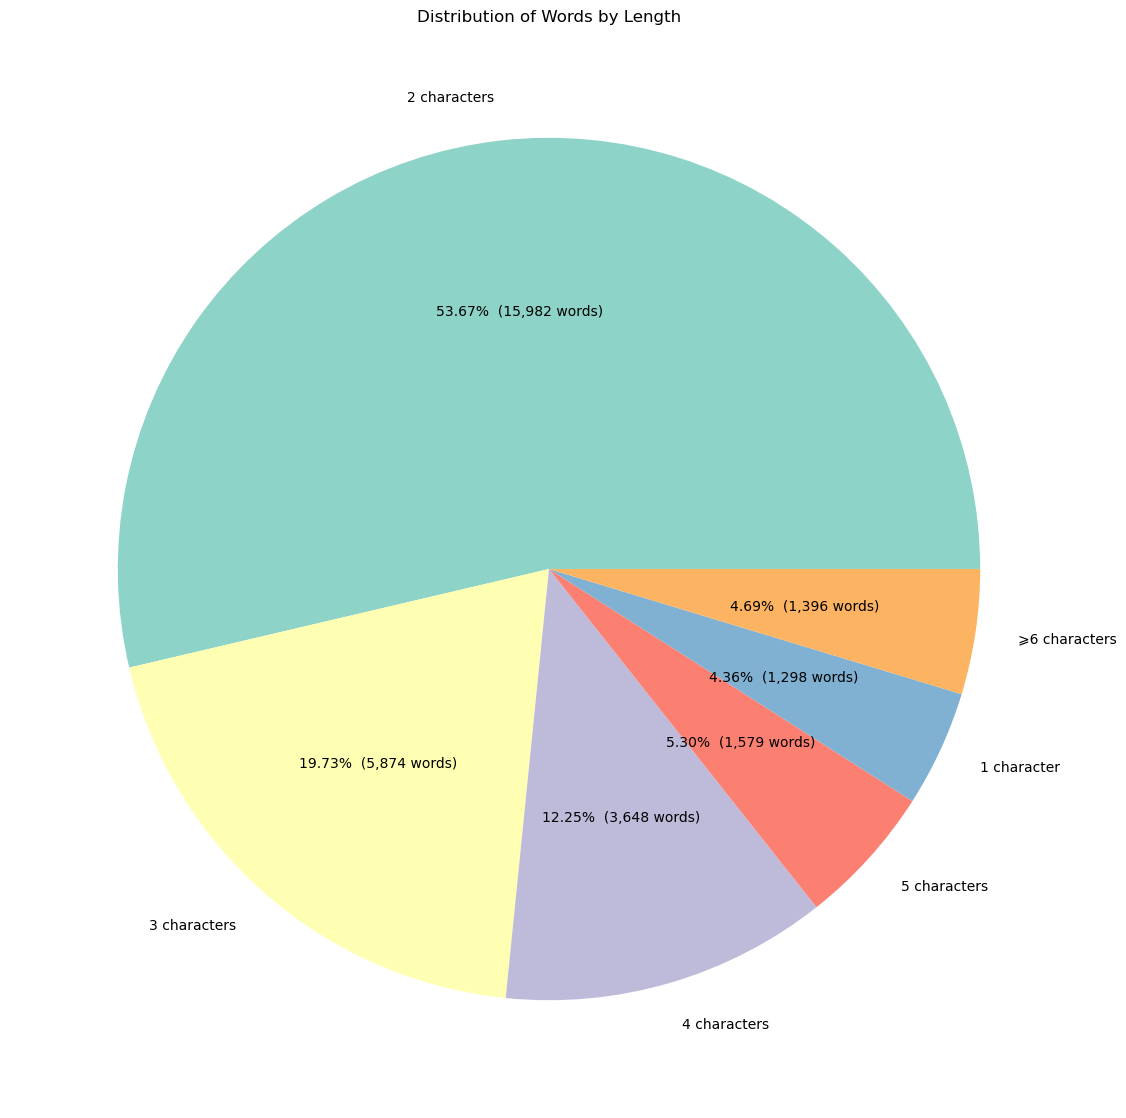

In [7]:
# plot the distribution of words by lengths
plt.figure(figsize=(14, 14))
plt.title('Distribution of Words by Length')
plt.pie(word_lengths.values(), labels=word_lengths.keys(), colors=colors[0],
        autopct=lambda p: '{:.2f}%  ({:,.0f} words)'.format(p, p * sum(word_lengths.values()) / 100))
plt.show()

In fine, we can give an answer to the question: words of length 2 are used most often.

**Q2: How many words are there related to honorific speech, words usually written using kana only and mimetic words?**

We'll use tags to find relevant words and their count.

**Note 1:** Kana-only words are the words represented in words.tsv using rare used, obsolete or archaic kanji, so they are usually written using kana alone.

**Note 2:** Words related to honorific speech are made up of 4 groups of words: respectful, polite, humble and formal words.

In [8]:
formal_count = len(words_df[words_df['tags'].apply(lambda tags: 'formal' in tags)])
respectful_count = len(words_df[words_df['tags'].apply(lambda tags: 'honorific' in tags)])
humble_count = len(words_df[words_df['tags'].apply(lambda tags: 'humble' in tags)])
# exclude words that have both 'polite' and 'humble' tags
polite_count = len(words_df[words_df['tags'].apply(lambda tags: ('polite' in tags and \
                                                                 'humble' not in tags))])
kana_only_count = len(words_df[words_df['tags'].apply(lambda tags: 'kana' in tags)])
mimetic_count = len(words_df[words_df['tags'].apply(lambda tags: 'mimetic' in tags)])
honorific_words = {'formal': formal_count, 'respectful': respectful_count,
                   'humble': humble_count, 'polite': polite_count}

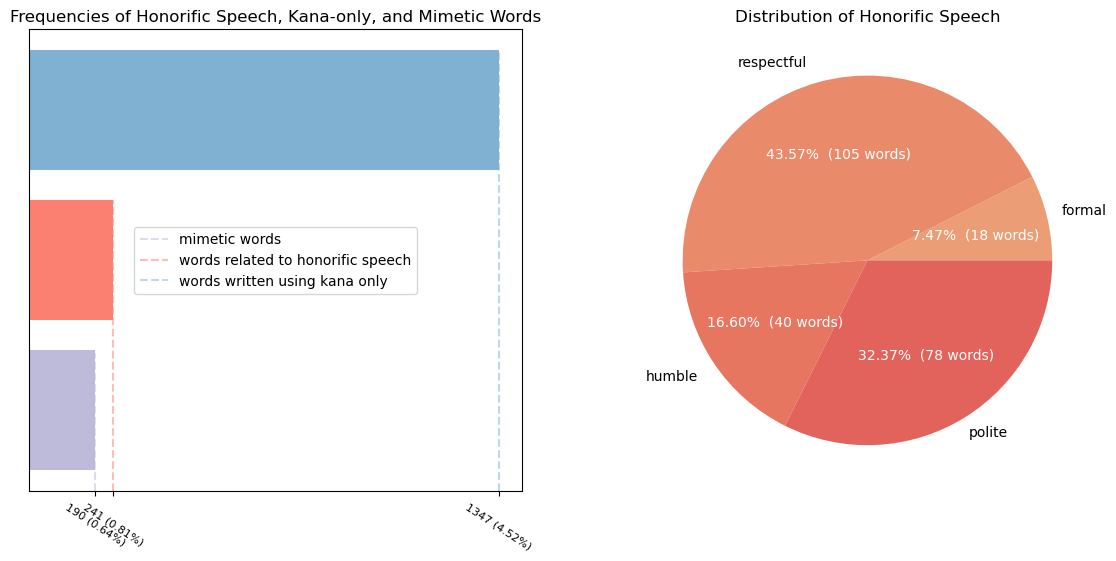

In [9]:
# plot in the appropriate form
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
values = [mimetic_count, sum(honorific_words.values()), kana_only_count]
ax1.set_title('Frequencies of Honorific Speech, Kana-only, and Mimetic Words')
for i, (ymax, value) in enumerate(zip([.3, .63, .95], values)):
    ax1.axvline(value, ymax=ymax, color=colors[0][2:][i], linestyle='dashed', alpha=.5)
ax1.barh([.25, .5, .75], values, height=.2, color=colors[0][2:])
ax1.legend(['mimetic words', 'words related to honorific speech', 'words written using kana only'],
           loc='center')
ax1.set_yticks([])
ax1.set_xticks(values)
ax1.set_xticklabels([f'{value} ({round(100 * value / words_count, 2)}%)' for value in values],
                    rotation=-33, fontsize=8)
ax2.set_title('Distribution of Honorific Speech')
ax2.pie(honorific_words.values(), colors=colors[2], autopct=lambda p: '{:.2f}%  ({:,.0f} words)'
        .format(p, p * sum(honorific_words.values()) / 100), textprops={'color': 'white'})
keys = list(honorific_words.keys())
for i, (x, y) in enumerate([(1.05, .25), (-.7, 1.05), (-1.2, -.65), (.55, -.95)]):
    ax2.text(x, y, keys[i])
plt.show()

Although mimetic words and words related to honorific speech constitute less than 1% of all words, kana-only words account for almost 5% of the common used vocabulary.

**Q3: What is the distribution of words by linguistic components?**

According to tags.tsv we have the following linguistic components:

In [10]:
lc = ['adjective', 'adverb', 'verb', 'conjunction', 'counter', 'noun', 'numeric',
       'particle', 'adjectival', 'pronoun', 'prefix', 'suffix']

Next, group the words by their linguistic components into a dictionary.

**Note:** In Japanese, parts of speech are not always clearly delineated, and the same words can belong to multiple categories. For example, the word 哀悼 can function as a noun, an adjective, or a verb. This means that a sentence like 哀悼の(adj)哀悼を(noun)哀悼すべきだ(verb) is actually grammatically correct.

In [11]:
words_by_lc = {comp: words_df[words_df['tags'].apply(lambda tags: comp in tags)] for comp in lc}

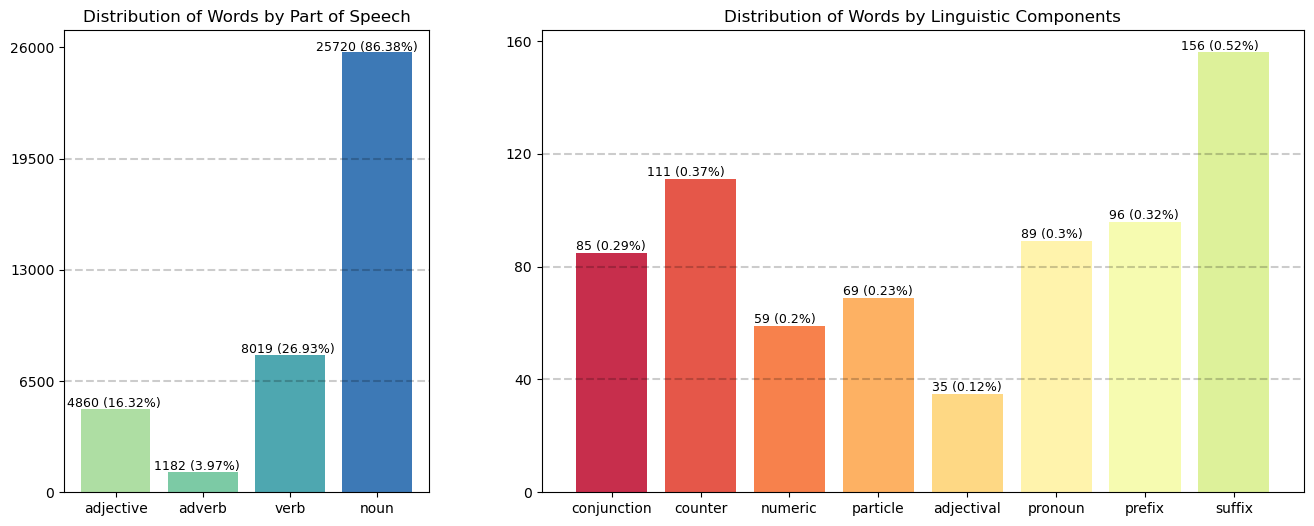

In [12]:
ax, x, labels, values = [None, None], [None, None], [[], []], [[], []]
yticks = [[0, 6500, 13000, 19500, 26000], [0, 40, 80, 120, 160]]
title_endings = ['Part of Speech', 'Linguistic Components']
fig, (ax[0], ax[1]) = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [11, 23]})
for key, df in words_by_lc.items():
    value = len(df)
    labels[int(value < 1000)].append(key)
    values[int(value < 1000)].append(value)
for i in range(2):
    xticks = list(range(len(labels[i])))
    ax[i].set_title(f'Distribution of Words by {title_endings[i]}')
    ax[i].set_xticks(xticks)
    ax[i].set_xticklabels(labels[i])
    ax[i].set_yticks(yticks[i])
    for j in range(3):
        ax[i].axhline(yticks[i][1 + j], color='black', linestyle='dashed', alpha=.2)
    ax[i].bar(xticks, values[i], color=colors[1][8 - 8 * i:])
    for x, y in zip(xticks, values[i]):
        ax[i].text(x - (.14 + .06 * i) * len(str(y)), y + 100 - 99 * i,
                   f'{y} ({round(100 * y / words_count, 2)}%)', fontsize=9)
plt.show()

Thus, the vast majority of words (more than 86%) are nouns, just over a quarter are verbs and 16% are adjectives and less than 4% are adverbs.

It is also obvious that the sum of the number of words in all parts of speech is greater than the total number of words from the words.tsv, which confirms the fact that some words belong to multiple categories.

Each group of functional words (represented in the right subplot) constitute less than 200 of words, but this is enough for Japanese grammar to be quite challenging.

**Q4: What is the distribution of words by JLPT level?**

Let's group the relevant words by JLPT levels and part of speech, and create a dictionary that counts their occurrences.

In [13]:
jlpt, parts_of_speech = defaultdict(list), ['noun', 'verb', 'adjective', 'adverb']
for i in range(5):
    jlpt_df = words_df[words_df['tags'].apply(lambda tags: f'n{i + 1}' in tags)]
    jlpt['total'].append(len(jlpt_df))
    for pos in parts_of_speech:
        jlpt[pos].append(len(jlpt_df[jlpt_df['tags'].apply(lambda tags: pos in tags)]))

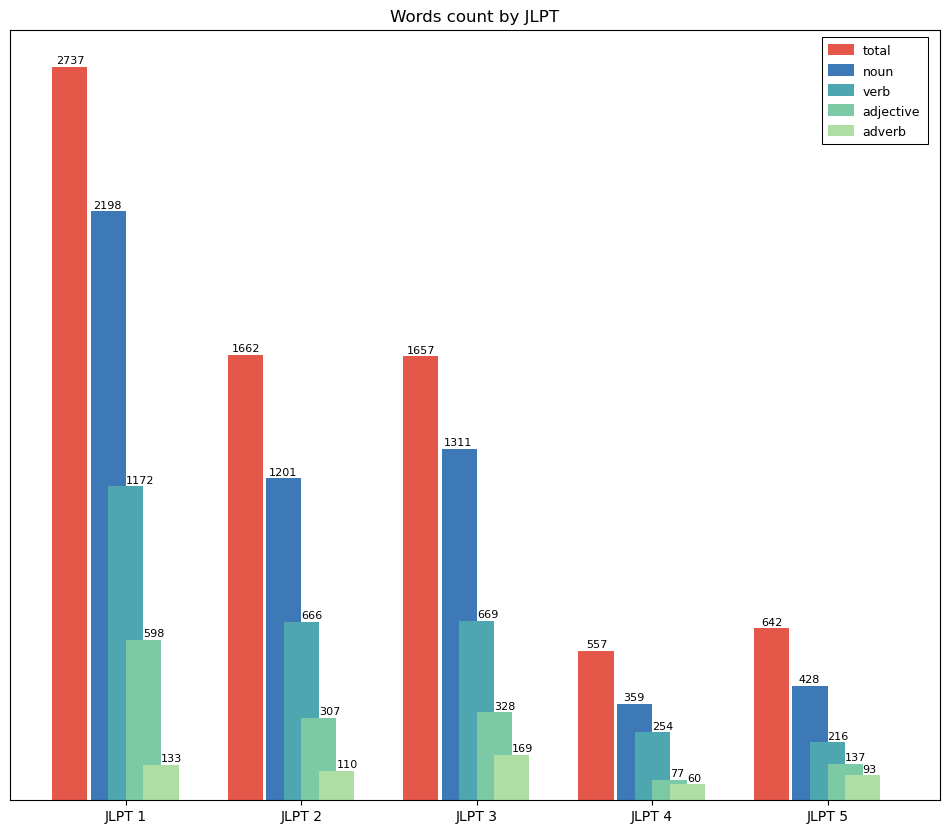

In [14]:
width, x = .1, np.array(range(5))
plt.figure(figsize=(12, 10))
ax = plt.axes()
ax.set_title('Words count by JLPT')
ax.bar(x - .32, jlpt['total'], width=2 * width, color=colors[1][1])
for j in range(5):
    offset = -.22 * width * (len(str(jlpt['total'][j]))) - .31
    ax.text(x[j] + offset, jlpt['total'][j] + 10, str(jlpt['total'][j]), fontsize=8)
for i, pos in enumerate(parts_of_speech):
    ax.bar(x + (i - 1) * width, jlpt[pos], width=2 * width, color=colors[1][8:][::-1][i])
    for j in range(5):
        offset = (-.22 * width * (len(str(jlpt[pos][j]))) - .1) if i == 0 else ((i - 1) * width)
        ax.text(x[j] + offset, jlpt[pos][j] + 10, str(jlpt[pos][j]), fontsize=8)
for i, pos in enumerate(['total'] + parts_of_speech):
    ax.bar(x, np.zeros(len(x)), color=colors[1][1:][i])
ax.set_xticks(range(5))
ax.set_yticks([])
ax.set_xticklabels([f'JLPT {i}' for i in range(1, 6)])
# legend
ax.add_patch(patches.Rectangle((3.97, 2750 - 75 * i), .6, 400, linewidth=.75, color='black', fc='none'))
for i, (text, color) in enumerate(zip(['total'] + parts_of_speech,
                                      [colors[1][1]] + [colors[1][8:][::-1][i] for i in range(4)])):
    ax.add_patch(patches.Rectangle((4, 2780 - 75 * i), .15, 42, facecolor=color))
    ax.text(4.2, 2780 - 75 * i, text, fontsize=9)
plt.show()

There are two noteworthy observations to be made:
* The number of words associated with N4 and N5 levels is roughly similar, as is the case with N2 and N3 levels.
* There is a sharp increase in the difference between the number of words between levels N4 and N3, as well as between N2 and N1.

# Conclusion

Our analysis allowed us to explore the distribution of commonly used Japanese words across different contexts, and we were able to visualize the results effectively. Additionally, our examination of the data enabled us to verify several key facts.